# SGD Algorithm to predict movie ratings

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. the data will be of this formate, each data point is represented as a triplet of user_id, movie_id and rating
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>
<h3>task 1: Predict the rating for a given (user_id, movie_id) pair</h3>
</pre>
<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>
then the predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as


$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2
    + \sum_{i} \sum_{k} u_{ik}^2
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

### TASK: 1
__SGD Algorithm to minimize the loss__
1. for each unique user initilize a bias value $B_{i}$ randomly, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user

2. for each unique movie initilize a bias value $C_{j}$ randomly, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie

3. Construct adjacency matrix with the given data, assumeing its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie
<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>
you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

4. we will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br>
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

5. So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

6. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie

7. $\mu$ represents the mean of all the rating given in the dataset
</pre>

<br>8.
<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
    predict the ratings with formula</pre>$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $
 <pre>
    print the mean squared error with predicted ratings
    </pre>

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>

10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$
### TASK: 2

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ratings_train.csv to ratings_train.csv


In [ ]:
import pandas as pd
data = pd.read_csv('ratings_train.csv')
data.shape

(89992, 3)

In [ ]:
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [ ]:
data.shape

(89992, 3)

mean

In [ ]:
a=0
for i in range(len(data['rating'])):
  a+=data['rating'][i]
rating_mean=a/len(data['rating'])
print("Mean:",rating_mean)

Mean: 3.529480398257623


In [ ]:
from scipy.sparse import csr_matrix
adj_matrix = csr_matrix((data['rating'].values, (data['user_id'].values, data['item_id'].values)))
print(adj_matrix.shape)

(943, 1681)


In [ ]:
print(adj_matrix[0])

In [ ]:
adjacent_mat=adj_matrix.todense()

In [ ]:
temp_list = []
for i in adjacent_mat:
    temp_list.append(list(i.A[0]))

In [ ]:
temp_list[0][0]

5

In [ ]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=15)
U = SVD.fit_transform(adj_matrix )
Sigma = SVD.explained_variance_ratio_
V = SVD.components_.T
print(U.shape)
print(V.shape)
print(Sigma.shape)

(943, 15)
(1681, 15)
(15,)


In [ ]:
import numpy as np


In [ ]:
b_1=np.random.normal(0,5,943)
c_1=np.random.normal(0,5,1662)
from tqdm import tqdm
import numpy as np
from numpy import linalg as LA
y_pred=[]
LOSS=[]
epochs=20
for epoch in tqdm(range(epochs)):
  loss=0
  for i in range(943):
    for j in range(1662):
        if(temp_list[i][j]==0):
          continue
        else:
          b_1[i]=b_1[i]-(0.1*(2*b_1[i]-2*(temp_list[i][j]-rating_mean-b_1[i]-c_1[j]-np.dot(U[i].T,V[j]))))
          c_1[j]=c_1[j]-(0.1*(2*c_1[j]-2*(temp_list[i][j]-rating_mean-b_1[i]-c_1[j]-np.dot(U[i].T,V[j]))))
          y1=rating_mean+b_1[i]+c_1[j]+np.dot(U[i].T,V[j])
          loss+=(temp_list[i][j]-y1)**2
  LOSS.append(loss*(1/len(data)))

In [ ]:
y2=[]
for i in range(943):
  for j in range(1662):
    if temp_list[i][j]==0:
      continue
    else:
      y1=rating_mean+b_1[i]+c_1[j]+np.dot(U[i].T,V[j])
      y2.append(y1)
for i in range(20):
  y2.append(5)
from sklearn.metrics import mean_squared_error
print( mean_squared_error(data.rating,y2))

0.877649548650334


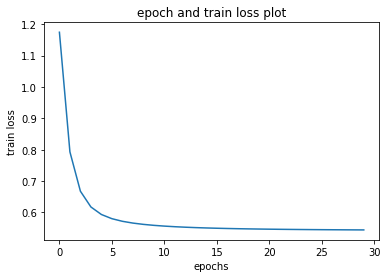

In [ ]:
e=[]
for i in range(20):
  e.append(i)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(e,LOSS)
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.title("epoch and train loss plot")
plt.show()


TASK-2

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving user_info.csv.txt to user_info.csv.txt


In [ ]:
import pandas as pd
data1=pd.read_csv('user_info.csv.txt')
data1.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [ ]:
y = data1['is_male'].values
X = data1.drop(['is_male'], axis=1)

In [ ]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=2)
U = SVD.fit_transform(X)
Sigma = SVD.explained_variance_ratio_
V = SVD.components_.T

In [ ]:

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(U, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
data1.info()

In [ ]:
len(data1.user_id)

943

In [ ]:
y_pre=clf.predict(U)

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix
sklearn.metrics.confusion_matrix(y, y_pre, labels=None, sample_weight=None, normalize=None)

array([[  0, 273],
       [  0, 670]])